<a href="https://colab.research.google.com/github/ThalyaGIT/BOE_Supervision_Challenge/blob/main/UK_Music_Happiness_and_Index_Returns_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
# Import packages
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
# Open CSV into dataframe
url = 'https://raw.githubusercontent.com/ThalyaGIT/Happy-Beats-Stocks/main/0-data-gold/data.csv'
df = pd.read_csv(url)

# Select columns that will be used
df = df[[ 'Date'
         , '% FTSE100 Change'                         # Dependent Variable: Weekly % Change in FTSE 100
         , 'Next Week % FTSE100 Change'              # Dependent Variable 2: Weekly % Change in FTSE 100
         , 'Change in SWAV'                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
         , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
         , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
         , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
         , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
         , 'Vix Close'                               # Control 5: Volaitlity Index of the day
         , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
         , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
        ]]

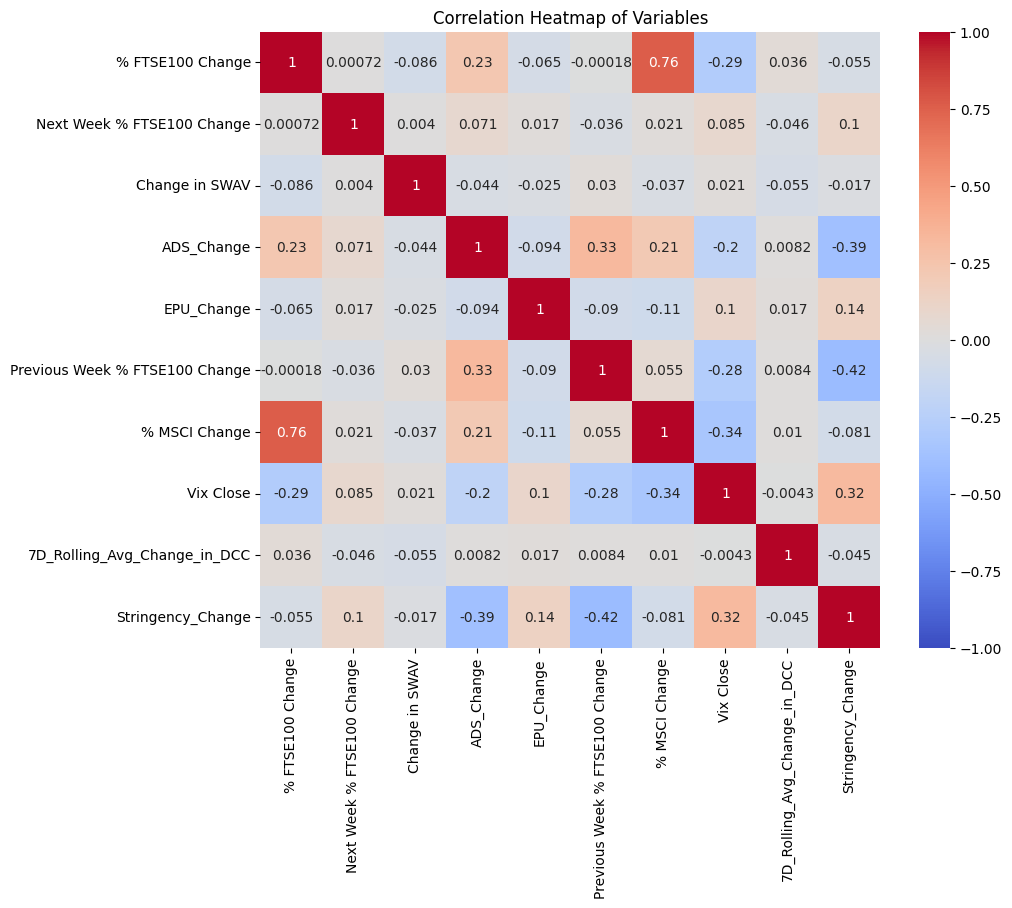

In [136]:
# Explore Data

# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['Date']).corr()


# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Variables')
plt.show()

# **Basic Regression with No Controlling Variables**

In [137]:
# Define dependent and independent variables

#  Define the dependent variable
y = df[ '% FTSE100 Change' ]

# Define the independent variable as 'Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify' Only
X = df[[ 'Change in SWAV' ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

In [138]:
# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     12.84
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           0.000349
Time:                        22:19:54   Log-Likelihood:                -4102.2
No. Observations:                1736   AIC:                             8208.
Df Residuals:                    1734   BIC:                             8219.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0525      0.062      0.

## Findings

**Low Explanatory Power:** The model has an R-squared of 0.006, indicating a poor fit.

**Significant Negative Effect:** Change in SWAV significantly decreases FTSE 100 change (coefficient = -11.5132, p < 0.001).

**Model Significance:** The model is statistically significant (F-statistic = 24.10, p < 0.001).

**Non-Significant Intercept:** The constant term is not significant (p = 0.508).

**Residual Issues:** Residuals show non-normality and autocorrelation, indicating model assumption problems.

# **Basic Regression with All Controlling Variables**




In [139]:
# Define dependent and independent variables

#  Define the dependent variable
y = df['% FTSE100 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df[[ 'Change in SWAV'                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
         , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
         , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
         , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
         , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
         , 'Vix Close'                               # Control 5: Volaitlity Index of the day
         , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
         , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
        ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

In [140]:
# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     324.2
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:19:54   Log-Likelihood:                -3312.7
No. Observations:                1736   AIC:                             6643.
Df Residuals:                    1727   BIC:                             6693.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Findings

**Good Fit**: The model has a high explanatory power with an **R-squared of 0.688**, indicating it explains **68.8% of the variance** in FTSE 100 changes.

### Significant Predictors:
- **Change in SWAV**: Significant negative effect (**coefficient = -6.7969**, **p < 0.001**).
- **ADS_Change**: Significant positive effect (**coefficient = 0.3047**, **p < 0.001**).
- **Previous Week % FTSE100 Change**: Significant negative effect (**coefficient = -0.1507**, **p < 0.001**).
- **% MSCI Change**: Significant positive effect (**coefficient = 0.6873**, **p < 0.001**).
- **Vix Close**: Significant negative effect (**coefficient = -0.0358**, **p < 0.001**).

### Insignificant Predictors:
- **EPU_Change**: Not significant (**p = 0.955**).
- **7D_Rolling_Avg_Change_in_DCC**: Marginally significant (**p = 0.064**).
- **Stringency_Change**: Not significant (**p = 0.782**).


**Model Significance**: The overall model is highly significant (**F-statistic = 1014**, **p < 0.001**).

**Residual Diagnostics**: Residuals show slight skewness and kurtosis, with a **Durbin-Watson statistic of 0.098** indicating potential autocorrelation issues.


# **Basic Regression without MSCI as a Control**

In [141]:
# Define dependent and independent variables

#  Define the dependent variable
y = df['% FTSE100 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df[[ 'Change in SWAV'                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
         , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
         , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
         , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
         #, '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
         , 'Vix Close'                               # Control 5: Volaitlity Index of the day
         , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
         , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
        ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     42.04
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           5.29e-55
Time:                        22:19:54   Log-Likelihood:                -3972.1
No. Observations:                1736   AIC:                             7960.
Df Residuals:                    1728   BIC:                             8004.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# **Basic Regression with all Controls for Next Week's FTSE Change**

In [142]:
# Define dependent and independent variables

#  Define the dependent variable
y = df['Next Week % FTSE100 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df[[ 'Change in SWAV'                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
         , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
         , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
         , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
         , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
         , 'Vix Close'                               # Control 5: Volaitlity Index of the day
         , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
         , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
        ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Next Week % FTSE100 Change   R-squared:                       0.032
Model:                                    OLS   Adj. R-squared:                  0.028
Method:                         Least Squares   F-statistic:                     7.237
Date:                        Wed, 07 Aug 2024   Prob (F-statistic):           1.77e-09
Time:                                22:19:54   Log-Likelihood:                -4079.3
No. Observations:                        1736   AIC:                             8177.
Df Residuals:                            1727   BIC:                             8226.
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

# **Basic Regression with all controls for 2017-2020**

In [143]:
# Define dependent and independent variables

# Define the start and end dates for the filter
start_date = '2017-01-01'
end_date = '2020-12-31'

# Filter the DataFrame for dates within the specified range
df_period1 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

#  Define the dependent variable
y = df_period1['% FTSE100 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df_period1[[ 'Change in SWAV'                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
                  , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
                  , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
                  , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
                  , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
                  , 'Vix Close'                               # Control 5: Volaitlity Index of the day
                  , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
                  , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
                  ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          2.98e-246
Time:                        22:19:54   Log-Likelihood:                -1883.4
No. Observations:                 995   AIC:                             3785.
Df Residuals:                     986   BIC:                             3829.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# **Basic Regression with all controls for 2021-2023**

In [144]:
# Define dependent and independent variables

# Define the start and end dates for the filter
start_date = '2021-01-01'
end_date = '2023-12-31'

# Filter the DataFrame for dates within the specified range
df_period2 = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

#  Define the dependent variable
y = df_period2['% FTSE100 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df_period2[[ 'Change in SWAV'                           # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
                , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
                , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
                , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
                , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
                , 'Vix Close'                               # Control 5: Volaitlity Index of the day
                , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
                , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
                ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     88.03
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          7.22e-102
Time:                        22:19:54   Log-Likelihood:                -1343.2
No. Observations:                 741   AIC:                             2704.
Df Residuals:                     732   BIC:                             2746.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       